# 1. Data Preparation

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv("data.csv")
df.head(5)

# MSRP the dependent variable

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


In [3]:
# Make the column names consistent, lower and without space
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head(1)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135


In [4]:
# consistency the content
object_cols = list(df.dtypes[df.dtypes == "object"].index)
for col in object_cols:
    df[col] = df[col].str.lower().str.replace(' ', '_')
    
df.head(2)

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity,msrp
0,bmw,1_series_m,2011,premium_unleaded_(required),335.0,6.0,manual,rear_wheel_drive,2.0,"factory_tuner,luxury,high-performance",compact,coupe,26,19,3916,46135
1,bmw,1_series,2011,premium_unleaded_(required),300.0,6.0,manual,rear_wheel_drive,2.0,"luxury,performance",compact,convertible,28,19,3916,40650


# 2. Exploratory Data Analysis

- Make: production
- model:
- year: year of production
- engine_fuel_type
- ...
- highway_mpg: how many miles per gallon petroleum in highway
- city_mpg
- popularity: how many mentions the car has
- msrp: price of cars

## a. Explore values in some columns


In [5]:
# number of doors have empty/missing values
for col in df.columns:
    print(col)
    print(df[col].unique()[:5])
    print(df[col].nunique())
    print()

make
['bmw' 'audi' 'fiat' 'mercedes-benz' 'chrysler']
48

model
['1_series_m' '1_series' '100' '124_spider' '190-class']
914

year
[2011 2012 2013 1992 1993]
28

engine_fuel_type
['premium_unleaded_(required)' 'regular_unleaded'
 'premium_unleaded_(recommended)' 'flex-fuel_(unleaded/e85)' 'diesel']
10

engine_hp
[335. 300. 230. 320. 172.]
356

engine_cylinders
[ 6.  4.  5.  8. 12.]
9

transmission_type
['manual' 'automatic' 'automated_manual' 'direct_drive' 'unknown']
5

driven_wheels
['rear_wheel_drive' 'front_wheel_drive' 'all_wheel_drive'
 'four_wheel_drive']
4

number_of_doors
[ 2.  4.  3. nan]
3

market_category
['factory_tuner,luxury,high-performance' 'luxury,performance'
 'luxury,high-performance' 'luxury' 'performance']
71

vehicle_size
['compact' 'midsize' 'large']
3

vehicle_style
['coupe' 'convertible' 'sedan' 'wagon' '4dr_hatchback']
16

highway_mpg
[26 28 27 25 24]
59

city_mpg
[19 20 18 17 16]
69

popularity
[3916 3105  819  617 1013]
48

msrp
[46135 40650 36350 29450 345

## b. Plot histogram for Price column

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<AxesSubplot:xlabel='msrp', ylabel='Count'>

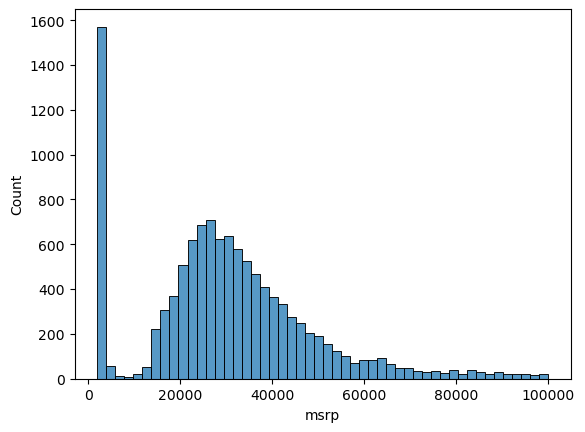

In [7]:
sns.histplot(df.msrp[df.msrp < 100000], bins = 50)
# long tail distribution, and there's unusual value in 1000s

In [8]:
# Apply logarithmic distribustion to make it more normal
# but if 0 value we apply log function we could have log(0) = -inf
# so we add all value with 1
np.log([0, 1, 10, 1000])

C:\Users\247\AppData\Local\Temp\ipykernel_2308\3462733100.py:4: RuntimeWarning: divide by zero encountered in log
  np.log([0, 1, 10, 1000])


array([      -inf, 0.        , 2.30258509, 6.90775528])

In [9]:
# function to plus 1
np.log1p([0, 1, 10, 1000])

array([0.        , 0.69314718, 2.39789527, 6.90875478])

<AxesSubplot:xlabel='msrp', ylabel='Count'>

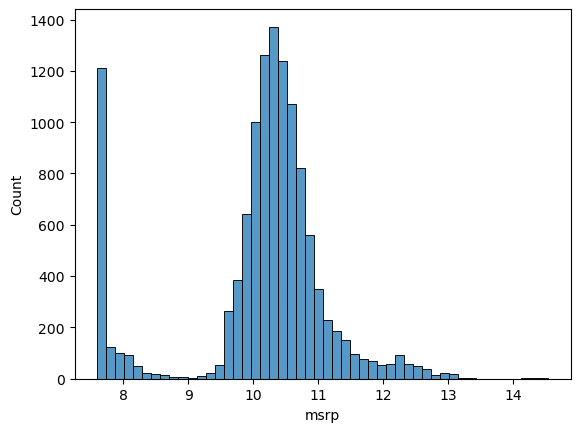

In [10]:
# more normal
price_logs = np.log1p(df.msrp)
sns.histplot(price_logs, bins = 50)

## c. Cek Missing Values

In [11]:
# check how many missing values
df.isnull().sum()

make                    0
model                   0
year                    0
engine_fuel_type        3
engine_hp              69
engine_cylinders       30
transmission_type       0
driven_wheels           0
number_of_doors         6
market_category      3742
vehicle_size            0
vehicle_style           0
highway_mpg             0
city_mpg                0
popularity              0
msrp                    0
dtype: int64

## 2.4 Setting up the validation framework

In [12]:
n = len(df)
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [13]:
n_val, n_test, n_train

(2382, 2382, 7150)

In [14]:
# shuffle rows
idx = np.arange(n)
np.random.seed(2)
np.random.shuffle(idx)

df_train = df.iloc[idx[:n_train]].reset_index(drop = True)
df_val = df.iloc[idx[n_train:n_train + n_val]].reset_index(drop = True)
df_test = df.iloc[idx[n_train + n_val:]].reset_index(drop = True)

In [15]:
len(df_train) + len(df_val) + len(df_test)

11914

In [16]:
# Separate y column or dependent variable
y_train = np.log1p(df_train.msrp.values)
y_val = np.log1p(df_val.msrp.values)
y_test = np.log1p(df_test.msrp.values)

In [17]:
# delete dependent variable from X dataframe
del df_train['msrp']
del df_val['msrp']
del df_test['msrp']

## 2.5 Linear Regression

In [18]:
df_train.iloc[10]
#y_train[10]

make                                 rolls-royce
model                     phantom_drophead_coupe
year                                        2015
engine_fuel_type     premium_unleaded_(required)
engine_hp                                  453.0
engine_cylinders                            12.0
transmission_type                      automatic
driven_wheels                   rear_wheel_drive
number_of_doors                              2.0
market_category        exotic,luxury,performance
vehicle_size                               large
vehicle_style                        convertible
highway_mpg                                   19
city_mpg                                      11
popularity                                    86
Name: 10, dtype: object

In [19]:
xi = [453, 11, 86]
w0 = 7.17
w = [0.01,0.04,0.002]

In [20]:
def linear_regression(xi):
    n = len(xi)
    pred = w0
    
    for j in range(n):
        pred = pred + w[j] * xi[j]
        
    return pred

In [21]:
linear_regression(xi)

12.312

In [22]:
np.expm1(12.312)

222347.2221101062

In [23]:
np.expm1(y_train[10])

479775.00000000006

## 2.6 Linear Regression Vector Form

In [24]:
def dot(xi, w):
    n = len(xi)
    res = 0.0
    
    for j in range(n):
        res = res + xi[j] * w[j]
    
    return res

In [25]:
def linear_regression(xi):
    return w0 + dot(xi, w)

In [26]:
w_new = [w0] + w
w_new

[7.17, 0.01, 0.04, 0.002]

In [27]:
x1 = [1, 148, 24, 1385]
x2 = [1, 132, 24, 1385]
x10 = [1, 453, 11, 86]

X = [x1, x2, x10]
X = np.array(X)
X

array([[   1,  148,   24, 1385],
       [   1,  132,   24, 1385],
       [   1,  453,   11,   86]])

In [28]:
def linear_regression(X):
    return X.dot(w_new)

In [29]:
linear_regression(X)

array([12.38 , 12.22 , 12.312])

## 2.7 Training Linear Regression

In [30]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

## 2.8 Car Price Baseline Model

In [31]:
base = ['engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg', 'popularity']
X_train = df_train[base].fillna(0).values
y_train

array([ 9.57574708,  9.887663  ,  9.89323518, ..., 10.45380308,
       12.62248099, 10.54061978])

In [32]:
w0, w = train_linear_regression(X_train, y_train)

In [33]:
y_pred = w0 + X_train.dot(w)
y_pred

array([ 9.54792783,  9.38733977,  9.67197758, ..., 10.30423015,
       11.9778914 ,  9.99863111])

<AxesSubplot:ylabel='Count'>

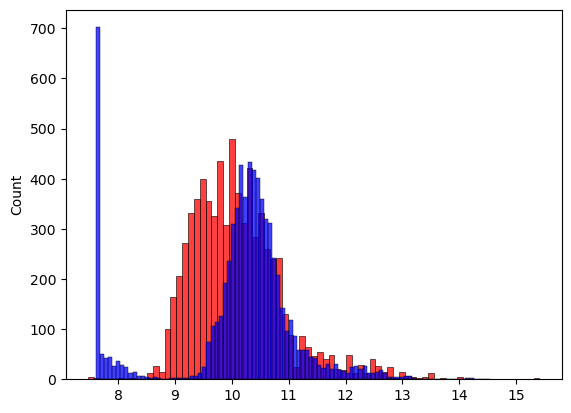

In [34]:
sns.histplot(y_pred, color = 'red')
sns.histplot(y_train, color = 'blue')

## 2.9 RMSE

In [35]:
def rmse(y, y_pred):
    error = y - y_pred
    se = error ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [36]:
rmse(y_train, y_pred)

0.7554192603920132

## 2.10 Computing RMSE on Validation Data

In [37]:
def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [38]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.7616530991301601

## 2.11 Simple Feature Engineering

In [39]:
def prepare_X(df):
    df = df.copy()
    df['age'] = 2017 - df.year # 2017 tahun maksimum di data
    features = base + ['age']
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [40]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.5172055461058335

<AxesSubplot:ylabel='Count'>

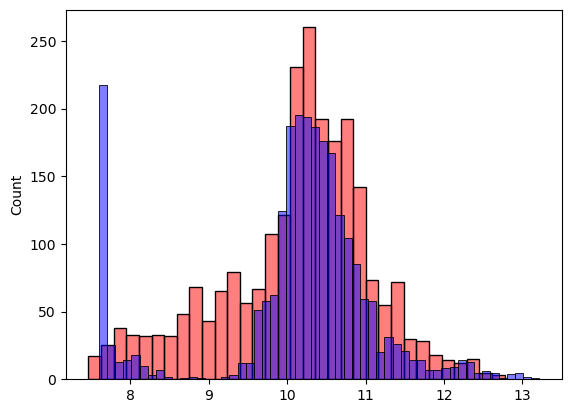

In [41]:
sns.histplot(y_pred, alpha = 0.5, color = 'red')
sns.histplot(y_val, alpha = 0.5, color = 'blue')

## 2.12 Categorical Variables

In [42]:
# most popular cars
makes = list(df.make.value_counts().head().index)

categorical_variables = ['make', 'engine_fuel_type', 'transmission_type',
             'driven_wheels', 'market_category', 'vehicle_size', 'vehicle_style']
categories = {}

for c in categorical_variables:
    categories[c] = list(df[c].value_counts().head().index)

In [43]:
categories

{'make': ['chevrolet', 'ford', 'volkswagen', 'toyota', 'dodge'],
 'engine_fuel_type': ['regular_unleaded',
  'premium_unleaded_(required)',
  'premium_unleaded_(recommended)',
  'flex-fuel_(unleaded/e85)',
  'diesel'],
 'transmission_type': ['automatic',
  'manual',
  'automated_manual',
  'direct_drive',
  'unknown'],
 'driven_wheels': ['front_wheel_drive',
  'rear_wheel_drive',
  'all_wheel_drive',
  'four_wheel_drive'],
 'market_category': ['crossover',
  'flex_fuel',
  'luxury',
  'luxury,performance',
  'hatchback'],
 'vehicle_size': ['compact', 'midsize', 'large'],
 'vehicle_style': ['sedan',
  '4dr_suv',
  'coupe',
  'convertible',
  '4dr_hatchback']}

In [44]:
def prepare_X(df):
    df = df.copy()
    features = base.copy()
    
    df['age'] = 2017 - df.year # 2017 tahun maksimum di data
    features.append('age')
    
    for v in [2, 3, 4]:
        df['num_doors_%s' % v] = (df.number_of_doors == v).astype('int')
        features.append('num_doors_%s' % v)
        
    for c, values in categories.items():
        for v in values:
            df['%s_%s' % (c, v)] = (df[c] == v).astype('int')
            features.append('%s_%s' % (c,v))
    
    df_num = df[features]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [45]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

# The RMSE is significantly going higher

30.49614122542036

## 2.13 Regularization

https://towardsdatascience.com/regularization-in-machine-learning-76441ddcf99a

https://www.statisticshowto.com/regularized-regression/#:~:text=What%20is%20Regularized%20Regression%3F,discouraged%2C%20primarily%20to%20avoid%20overfitting.

Regularization, significantly reduces the variance of the model, without substantial increase in its bias.

In [ ]:
# Controlling the weights
# If we have kinda similar or duplicate columns of X it'd disturb the model

In [46]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])
    
    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
    
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    return w_full[0], w_full[1:]

In [47]:
X_train = prepare_X(df_train)
w0,w = train_linear_regression_reg(X_train, y_train)
X_val = prepare_X(df_val)
y_pred = w0 + X_val.dot(w)

rmse(y_val, y_pred)

0.4565175086968008

## 2.14 Tuning the model

In [49]:
for r in [0.0, 0.00001, 0.0001, 0.001, 0.1, 1, 10]:
    X_train = prepare_X(df_train)
    w0,w = train_linear_regression_reg(X_train, y_train, r = r)
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)

    score = rmse(y_val, y_pred)
    print(r, w0, score)

0.0 1.1755893098228356e+16 30.49614122542036
1e-05 9.603423230785483 0.45651701062736316
0.0001 6.323432447489521 0.45651706307917794
0.001 6.28552246198999 0.4565175086968008
0.1 6.1912086741971875 0.45656927630377264
1 5.634896667768018 0.4572204317997342
10 4.2839801089709955 0.4701456932098991


In [ ]:
r = 0.001

## 2.15 Using the Model

In [54]:
# Combine train and validation
df_full_train = pd.concat([df_train, df_val]).reset_index(drop = True)
X_full_train = prepare_X(df_full_train)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r = 0.001)

In [56]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.45177493046721484

In [60]:
car = df_test.iloc[20].to_dict()
car 

{'make': 'toyota',
 'model': 'sienna',
 'year': 2015,
 'engine_fuel_type': 'regular_unleaded',
 'engine_hp': 266.0,
 'engine_cylinders': 6.0,
 'transmission_type': 'automatic',
 'driven_wheels': 'front_wheel_drive',
 'number_of_doors': 4.0,
 'market_category': nan,
 'vehicle_size': 'large',
 'vehicle_style': 'passenger_minivan',
 'highway_mpg': 25,
 'city_mpg': 18,
 'popularity': 2031}

In [61]:
df_small = pd.DataFrame([car])
df_small

,make,model,year,engine_fuel_type,engine_hp,engine_cylinders,transmission_type,driven_wheels,number_of_doors,market_category,vehicle_size,vehicle_style,highway_mpg,city_mpg,popularity
0,toyota,sienna,2015,regular_unleaded,266.0,6.0,automatic,front_wheel_drive,4.0,NaN,large,passenger_minivan,25,18,2031


In [65]:
X_small = prepare_X(df_small)
y_pred = w0 + X_small.dot(w)
y_pred

array([10.46265172])

In [66]:
np.expm1(y_pred)

array([34983.1969154])

In [68]:
np.expm1(y_test[20])

35000.00000000001